In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#train_test_split and GridSearch
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score,classification_report, confusion_matrix, ConfusionMatrixDisplay,RocCurveDisplay

#Logistic Regression libraries
from sklearn.linear_model import LogisticRegression

#LDA libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

#KNN
from sklearn.neighbors import KNeighborsClassifier

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Bagging
from sklearn.ensemble import BaggingClassifier

#Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#SMOTE
from imblearn.over_sampling import SMOTE

In [2]:
elec_data = pd.read_excel("D:/DataSets/Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

## Data Ingestion: 
## Reading the dataset. Doing the descriptive statistics, null value condition check and write an inference on it.

In [3]:
elec_data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
elec_data.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
elec_data.shape

(1525, 10)

In [6]:
elec_data.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
elec_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
elec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [9]:
elec_data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [10]:
elec_data[elec_data.duplicated()]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [11]:
ind = elec_data[elec_data.duplicated()].index
elec_data.drop(labels=ind,axis=0,inplace=True)

In [12]:
elec_data[elec_data.duplicated()]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [13]:
cat_cols = elec_data.select_dtypes(include="object").columns
num_cols = elec_data.select_dtypes(exclude="object").columns

print("Categorical levels:\n")
for i in cat_cols:
    print("{}:\n{}\n".format(i,elec_data[i].value_counts()))

Categorical levels:

vote:
Labour          1057
Conservative     460
Name: vote, dtype: int64

gender:
female    808
male      709
Name: gender, dtype: int64



In [14]:
print("Continuous levels:\n")
for i in num_cols:
    print("{}:\n{}\n".format(i,elec_data[i].value_counts().sort_index()))

Continuous levels:

age:
24    11
25     4
26     7
27    15
28     9
      ..
89     5
90     1
91     1
92     2
93     1
Name: age, Length: 70, dtype: int64

economic.cond.national:
1     37
2    256
3    604
4    538
5     82
Name: economic.cond.national, dtype: int64

economic.cond.household:
1     65
2    280
3    645
4    435
5     92
Name: economic.cond.household, dtype: int64

Blair:
1     97
2    434
3      1
4    833
5    152
Name: Blair, dtype: int64

Hague:
1    233
2    617
3     37
4    557
5     73
Name: Hague, dtype: int64

Europe:
1     109
2      77
3     128
4     126
5     123
6     207
7      86
8     111
9     111
10    101
11    338
Name: Europe, dtype: int64

political.knowledge:
0    454
1     38
2    776
3    249
Name: political.knowledge, dtype: int64



In [15]:
elec_data.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

### Inference:
- The data consists of 1525 rows and 10 columns
- The data consists of 2 categorical and 8 continuous variables
- The data consists of 2 object type and 8 integer type columns
- The 1st column represents the “S. No” hence it has been dropped
- No null values exist in the dataset
- 8 duplicate values were found and were dropped from the dataset
- Except the age column, all the other numeric columns have certain fixed levels therefore they can also be treated as categorical variables
- It can also be observed that the target/dependent variable "vote" seems to be unevenly distributed as the number of votes for the “Conservative” level are approximately half when compared to its counterpart “Labour” level
- This is an indication of an unbalanced dependent variable which means that an over-sampling techniques such as SMOTE can be used when building the ML models to compensate for this balance
- It can be observed that most of the columns have negative skew values.

## Performing Univariate and Bivariate Analysis. Doing exploratory data analysis.

### Univariate Analysis

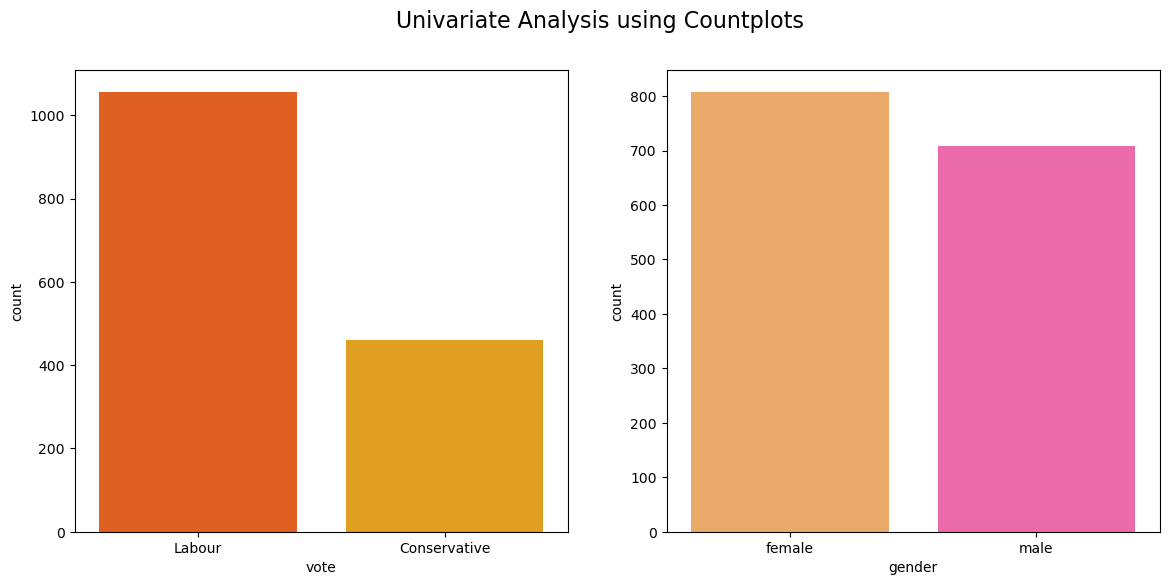

In [16]:
#Categorical Variables
fig, axes = plt.subplots(1,2,figsize=(14,6))
sns.countplot(x=elec_data["vote"],ax=axes[0],palette="autumn")
sns.countplot(x=elec_data["gender"],ax=axes[1],palette="spring_r")
plt.suptitle("Univariate Analysis using Countplots",fontsize=16)
plt.show()

#### Continuous variable

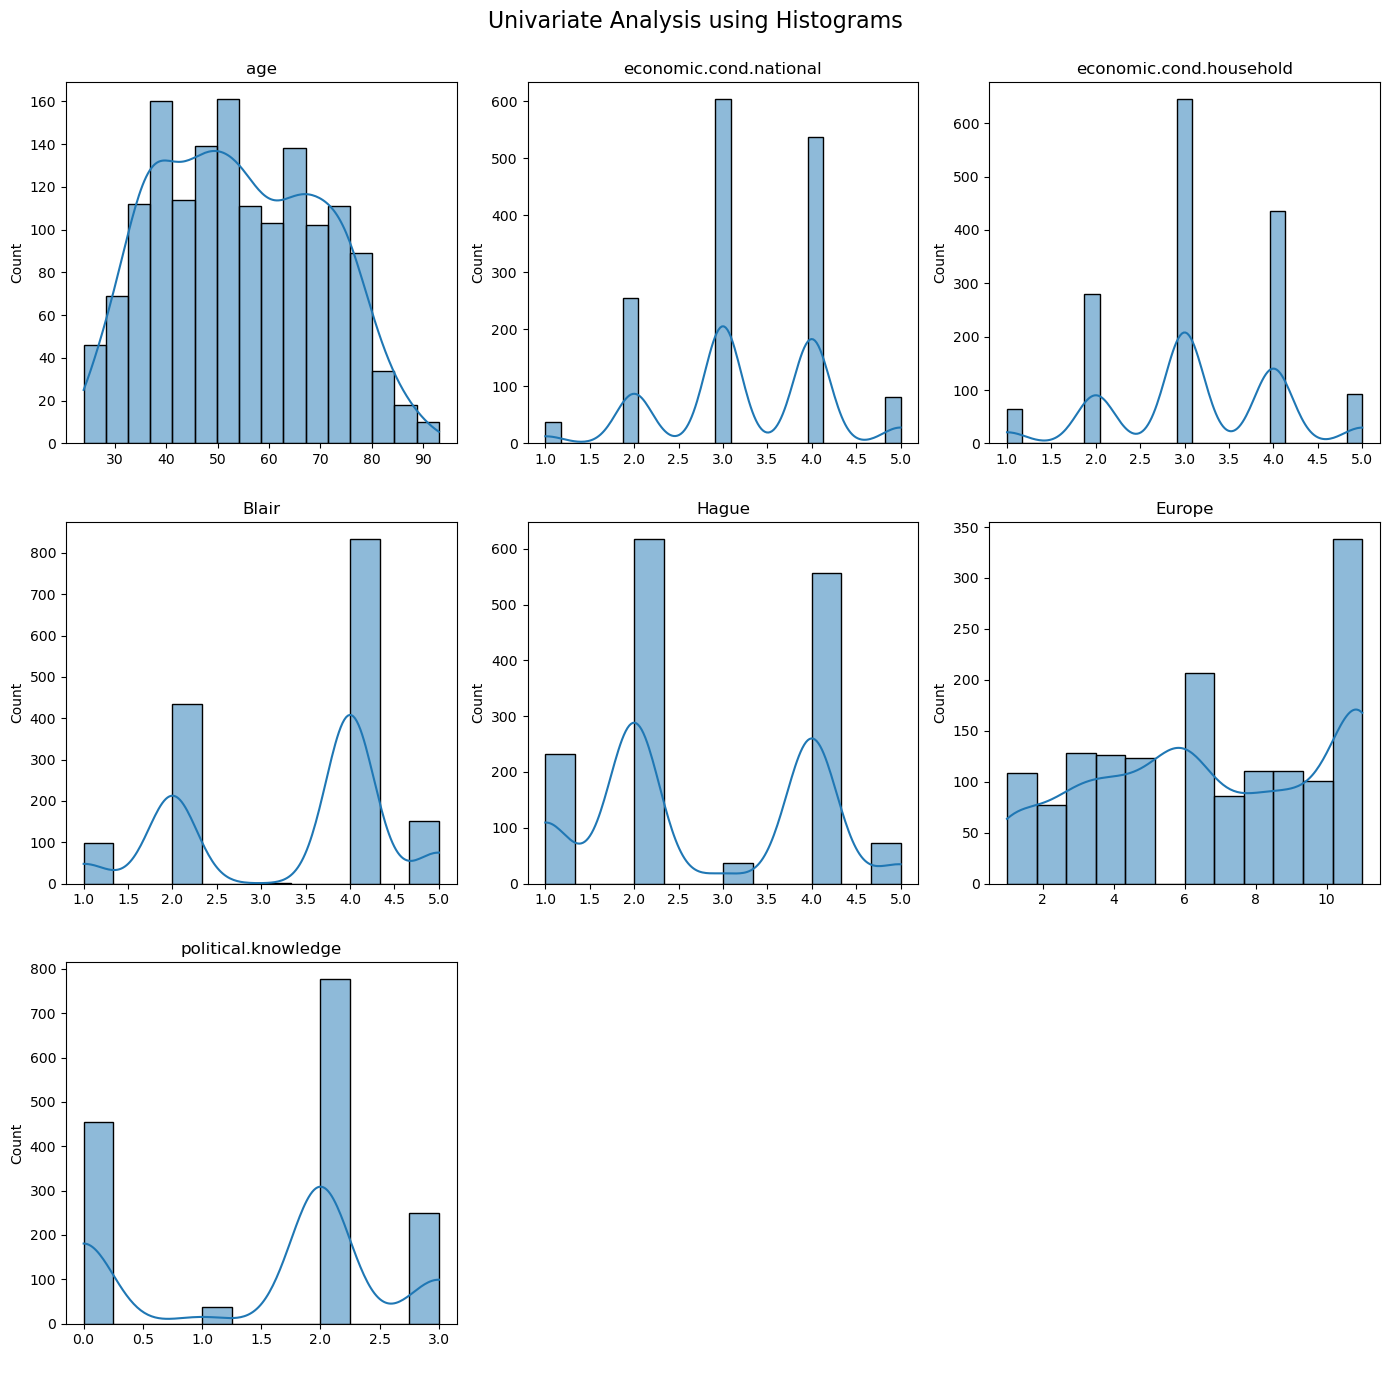

In [17]:
def HistPlots():
    col = len(num_cols)
    plt.figure(figsize=(14,14))
    plt.suptitle("Univariate Analysis using Histograms\n", fontsize=16);
    for i in range(0,col):
        plt.subplot(3,3,i+1)
        plt.title("{}".format(num_cols[i]))
        sns.histplot(x=elec_data[num_cols[i]],kde=True);
        plt.xlabel(xlabel = " ")
        plt.tight_layout()
HistPlots()

### Bivariate Analysis

#### Categorical and Categorical

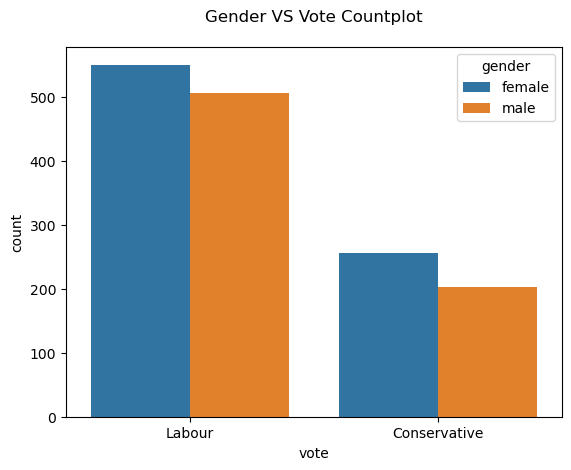

In [18]:
sns.countplot(x=elec_data["vote"],hue=elec_data["gender"]);
plt.title("Gender VS Vote Countplot\n");

#### Numeric and Numeric

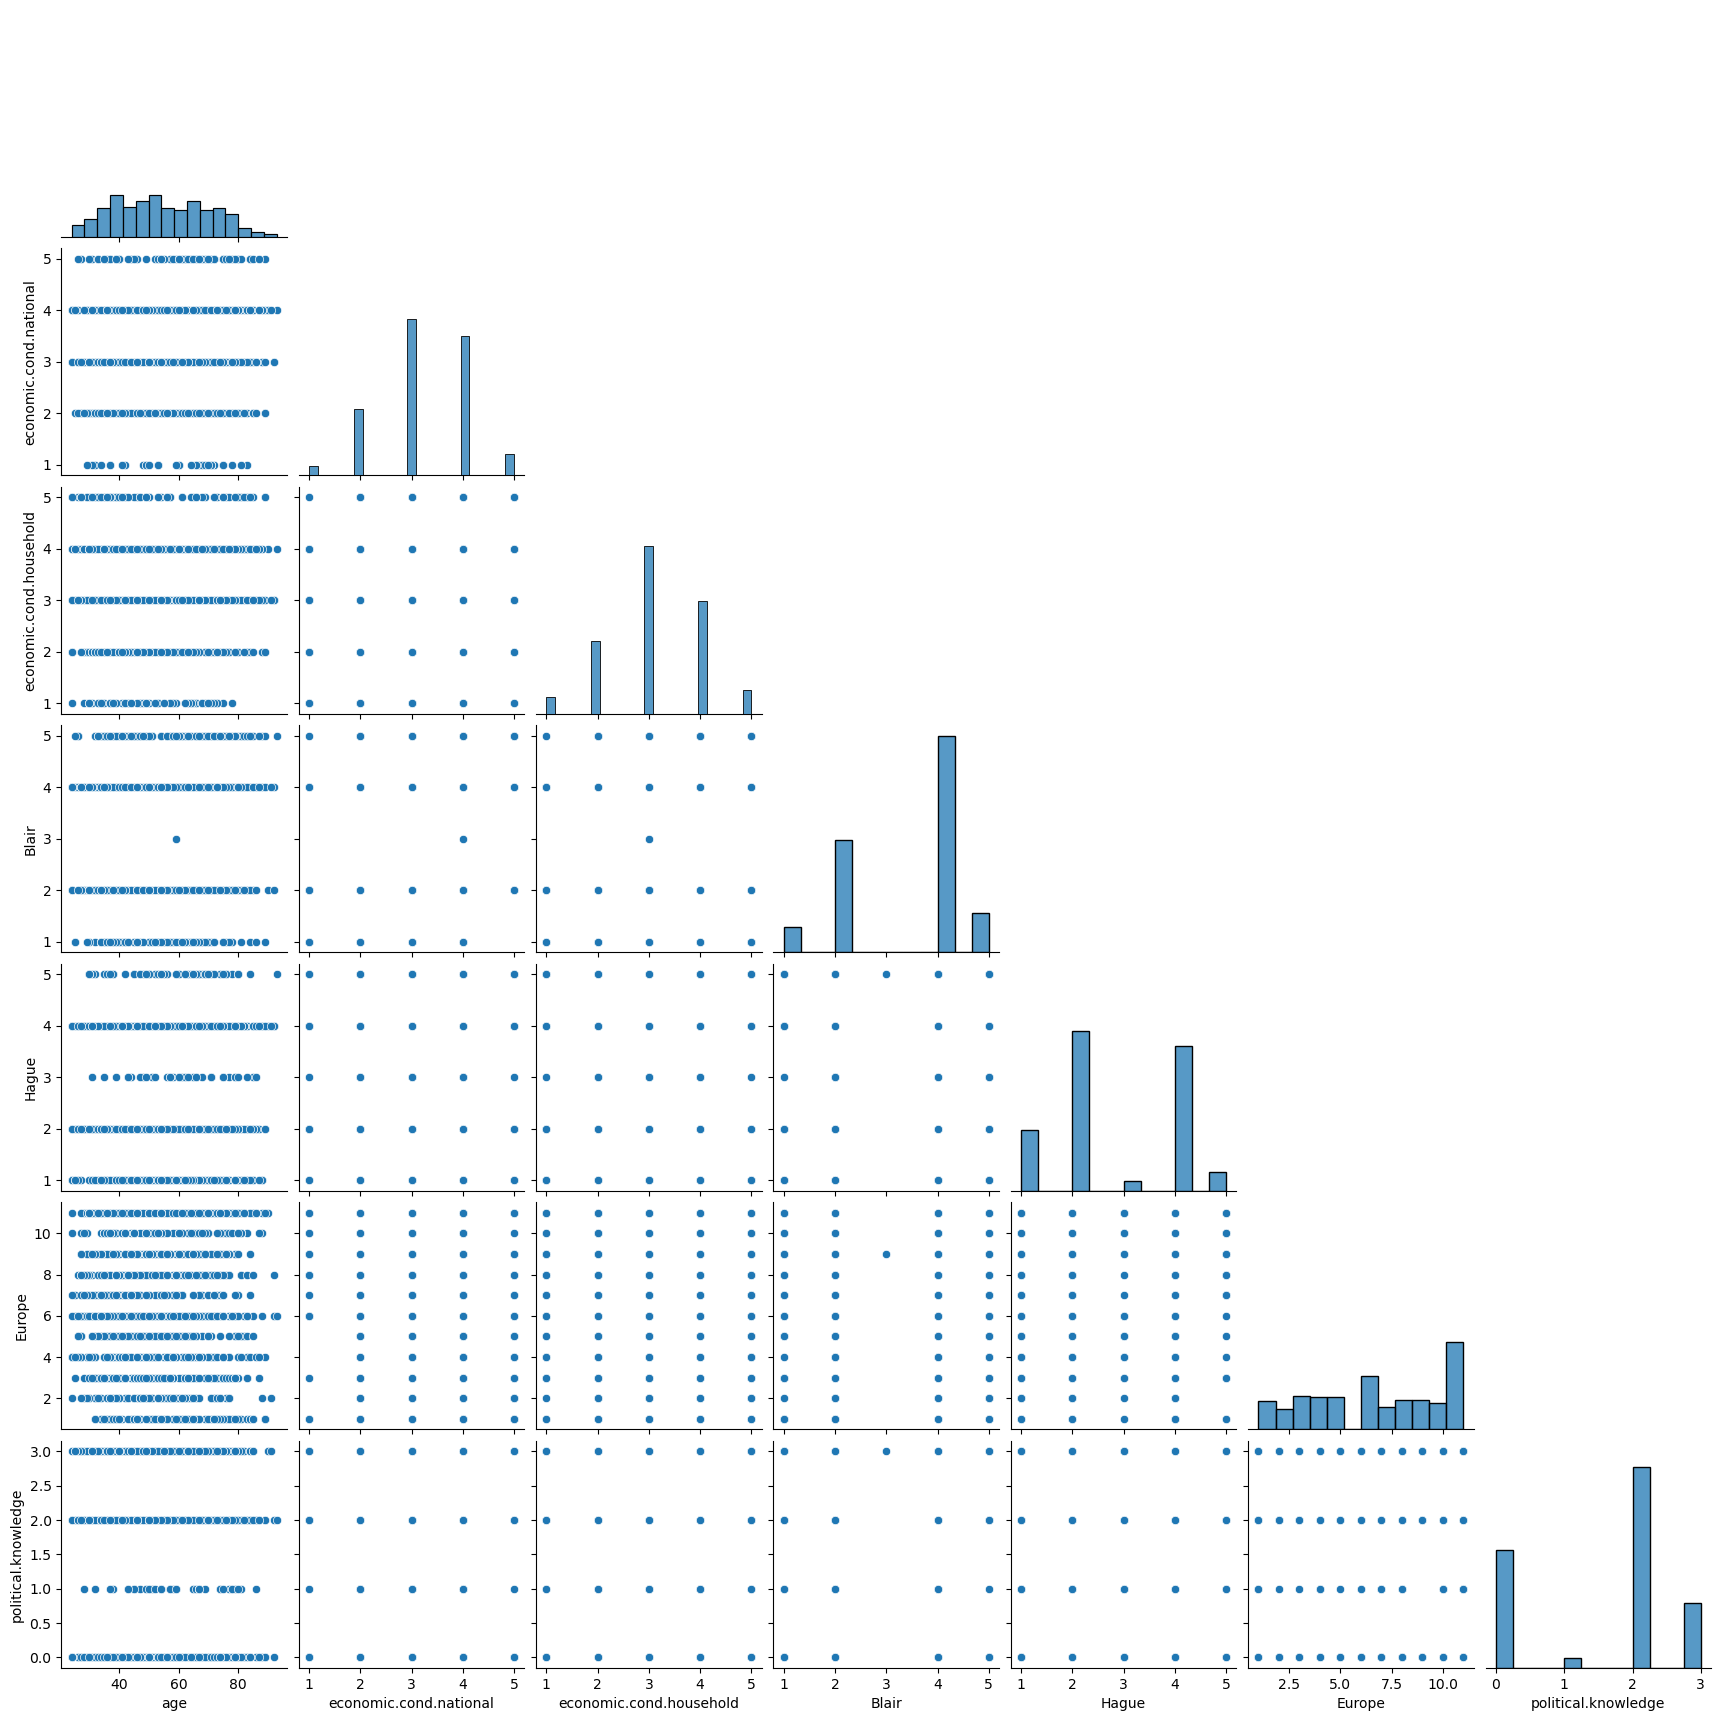

In [19]:
sns.pairplot(elec_data[num_cols],corner=True);

#### Categoric and Numeric
#### For Gender

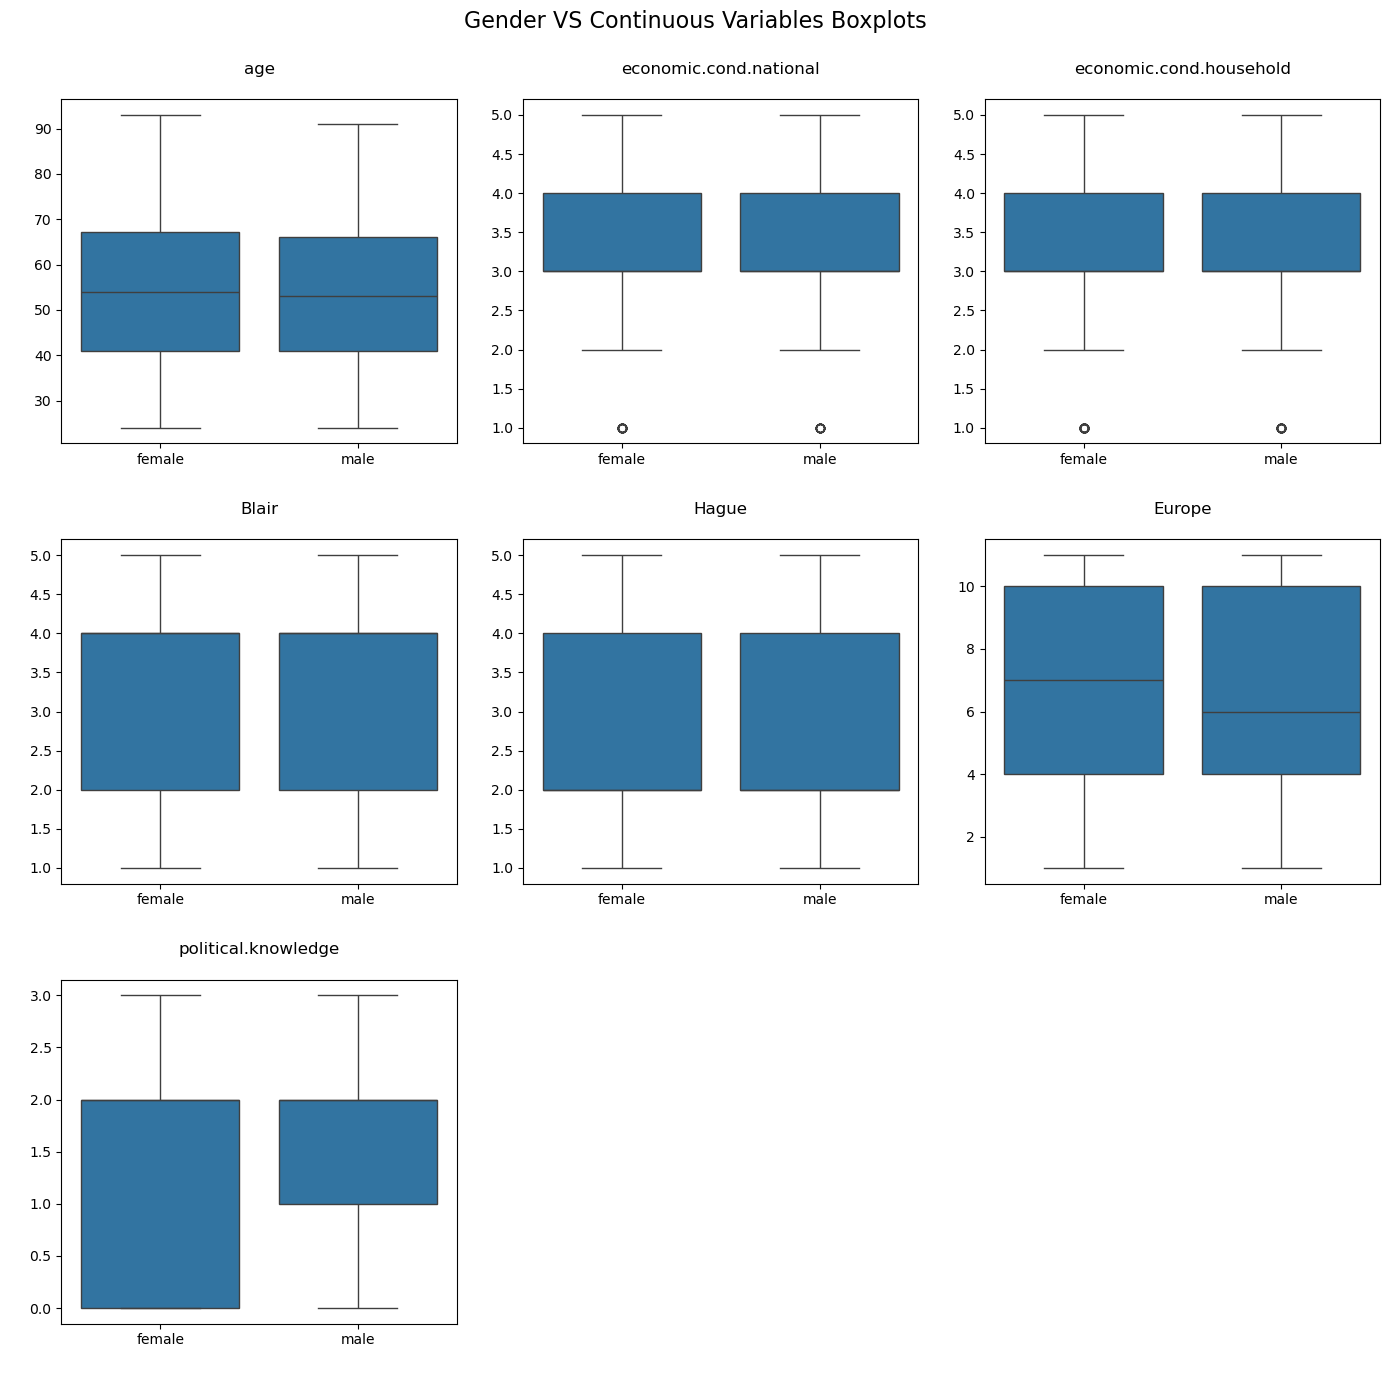

In [20]:
def GenderPlots():
    col = len(num_cols)
    plt.figure(figsize=(14,14))
    plt.suptitle("Gender VS Continuous Variables Boxplots\n",fontsize=16)
    for i in range(0,col):
        plt.subplot(3,3,i+1)
        plt.title("{}\n".format(num_cols[i]))
        sns.boxplot(x=elec_data["gender"],y=elec_data[num_cols[i]]);
        plt.ylabel(ylabel= " ")
        plt.xlabel(xlabel= " ")
        plt.tight_layout()
GenderPlots()

#### Categoric and Numeric
#### For Vote

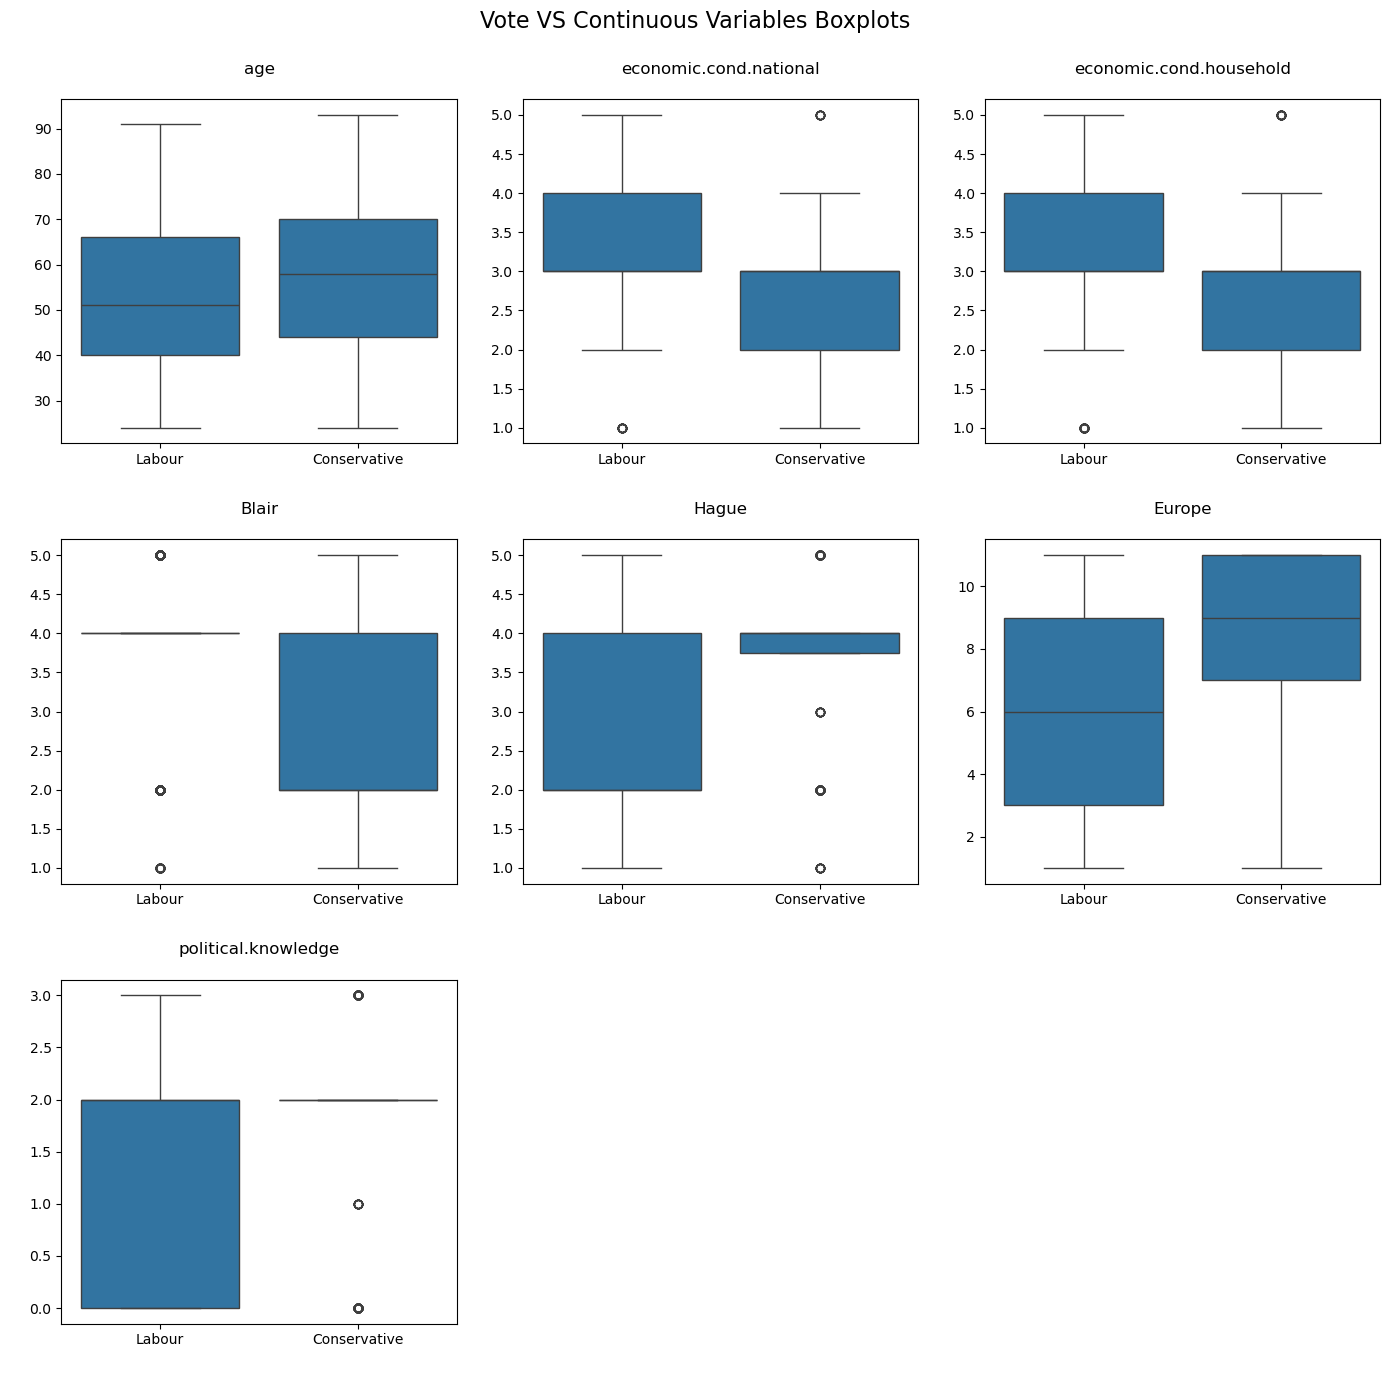

In [21]:
def VotePlots():
    col = len(num_cols)
    plt.figure(figsize=(14,14))
    plt.suptitle("Vote VS Continuous Variables Boxplots\n",fontsize=16)
    for i in range(0,col):
        plt.subplot(3,3,i+1)
        plt.title("{}\n".format(num_cols[i]))
        sns.boxplot(x=elec_data["vote"],y=elec_data[num_cols[i]]);
        plt.xlabel(xlabel= " ")
        plt.ylabel(ylabel= " ")
        plt.tight_layout()
VotePlots()

#### Continuous variable

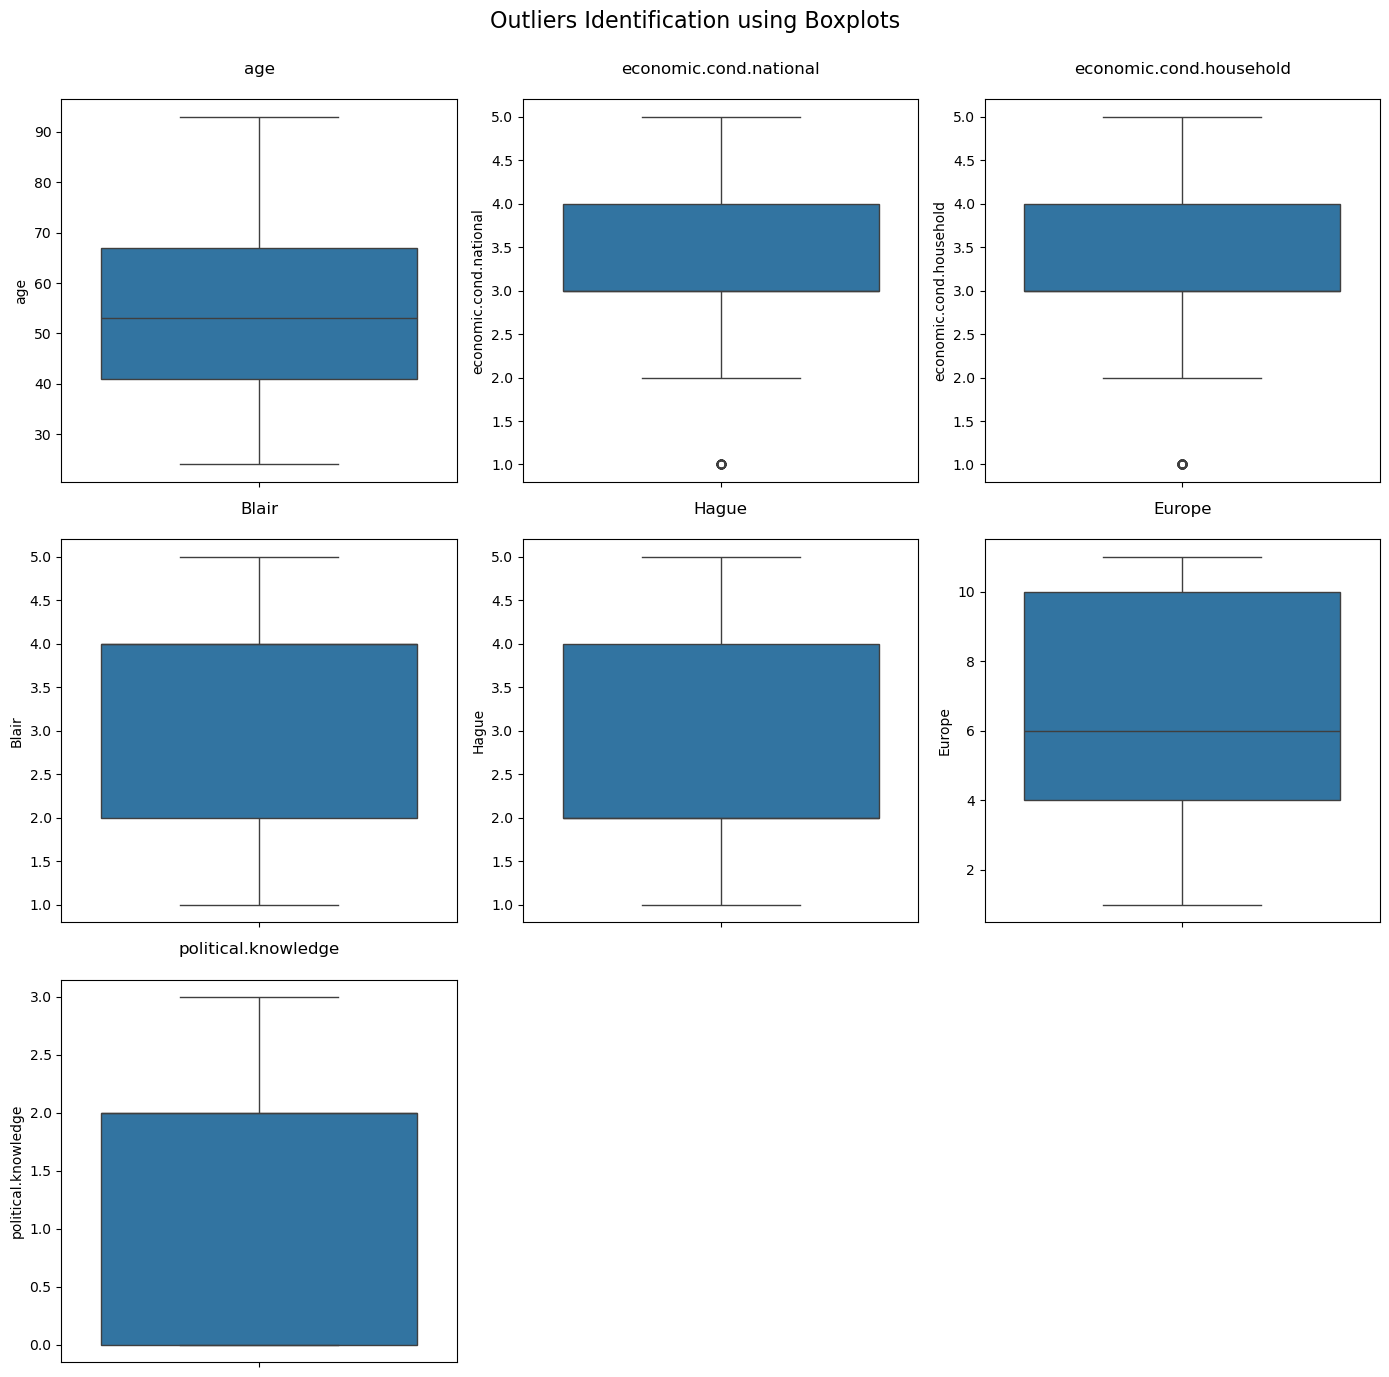

In [22]:
def BoxPlots():
    col = len(num_cols)
    plt.figure(figsize=(14,14))
    plt.suptitle("Outliers Identification using Boxplots\n",fontsize=16)
    for i in range(0,col):
        plt.subplot(3,3,i+1)
        plt.title("{}\n".format(num_cols[i]))
        sns.boxplot(y=elec_data[num_cols[i]]);
        plt.tight_layout()
BoxPlots()

## Data Preparation:
### Encoding the data (having string values) for Modelling. Data Split: Splitting the data into train and test (70:30).

In [23]:
elec_data = pd.get_dummies(elec_data,columns=["gender","vote"],drop_first=True)
elec_data.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male,vote_Labour
0,43,3,3,4,1,2,2,0,1
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,0,1
4,41,2,2,1,1,6,2,1,1


In [24]:
elec_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender_male,1517.0,0.467370,0.499099,0.0,0.0,0.0,1.0,1.0
vote_Labour,1517.0,0.696770,0.459805,0.0,0.0,1.0,1.0,1.0


## Data splitting

In [25]:
X = elec_data.drop("vote_Labour",axis=1)
y = elec_data["vote_Labour"]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,test_size=0.3)

In [26]:
print("Training data shape:\n{}\t{}\n\nTesting data shape:\n{}\t{}".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

Training data shape:
(1061, 8)	(1061,)

Testing data shape:
(456, 8)	(456,)


## Modeling:
### Applying Logistic Regression and LDA (linear discriminant analysis).

## Logistic Regression

In [27]:
log_model = LogisticRegression(solver="liblinear")
log_model.fit(X_train,y_train)

#Train
ytrain_predict_log = log_model.predict(X_train)
model_score_train_log = log_model.score(X_train, y_train) #Model Score
report_log_train = classification_report(y_train,ytrain_predict_log) #Classification Report

#Test
ytest_predict_log = log_model.predict(X_test)
model_score_test_log = log_model.score(X_test, y_test) #Model Score
report_log_test = classification_report(y_test,ytest_predict_log) #Classification Report

print("Model Summary for Logistic Regression Model:\n\nTrain Data:\n\nModel Score: {}\nClassification Report:\n{}\n\nTest Data:\n\nModel Score: {}\nClassification Report\n{}".format(round(model_score_train_log,3),report_log_train,round(model_score_test_log,3),report_log_test))

Model Summary for Logistic Regression Model:

Train Data:

Model Score: 0.841
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       319
           1       0.87      0.91      0.89       742

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061


Test Data:

Model Score: 0.818
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.61      0.67       141
           1       0.84      0.91      0.87       315

    accuracy                           0.82       456
   macro avg       0.80      0.76      0.77       456
weighted avg       0.81      0.82      0.81       456



### Linear Discriminant Analysis

In [28]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

#### Training the data

In [29]:
ytrain_predict_lda = lda_model.predict(X_train)
model_score_train_lda = lda_model.score(X_train, y_train) #Model Score
report_lda_train = classification_report(y_train,ytrain_predict_lda) #Classification Report

#### Testing the data

In [30]:
ytest_predict_lda = lda_model.predict(X_test)
model_score_test_lda = lda_model.score(X_test, y_test) #Model Score
report_lda_test = classification_report(y_test,ytest_predict_lda) #Classification Report

print("Model Summary for LDA Model:\n\nTrain Data:\n\nModel Score: {}\nClassification Report:\n{}\n\nTest Data:\n\nModel Score: {}\nClassification Report\n{}".format(round(model_score_train_lda,3),report_lda_train,round(model_score_test_lda,3),report_lda_test))

Model Summary for LDA Model:

Train Data:

Model Score: 0.839
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       319
           1       0.87      0.90      0.89       742

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061


Test Data:

Model Score: 0.825
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       141
           1       0.85      0.90      0.88       315

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



## Applying KNN Model and Naïve Bayes Modeland Interpretting the results.

### KNN

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=5,weights="uniform")
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

#### Training the data

In [32]:
ytrain_predict_knn = knn_model.predict(X_train)
model_score_train_knn = knn_model.score(X_train, y_train) #Model Score
report_knn_train = classification_report(y_train,ytrain_predict_knn) #Classification Report

#### Testing the data

In [33]:
ytest_predict_knn = knn_model.predict(X_test)
model_score_test_knn = knn_model.score(X_test, y_test) #Model Score
report_knn_test = classification_report(y_test,ytest_predict_knn) #Classification Report

print("Model Summary for KNN Model (weights=distance):\n\nTrain Data:\n\nModel Score: {}\nClassification Report:\n{}\n\nTest Data:\n\nModel Score: {}\nClassification Report\n{}".format(round(model_score_train_knn,3),report_knn_train,round(model_score_test_knn,3),report_knn_test))

Model Summary for KNN Model (weights=distance):

Train Data:

Model Score: 0.866
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       319
           1       0.89      0.93      0.91       742

    accuracy                           0.87      1061
   macro avg       0.85      0.83      0.84      1061
weighted avg       0.86      0.87      0.86      1061


Test Data:

Model Score: 0.772
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       141
           1       0.81      0.87      0.84       315

    accuracy                           0.77       456
   macro avg       0.73      0.71      0.72       456
weighted avg       0.76      0.77      0.77       456



<b> It can be observed that this is an example of an overfit KNN model which means that the model needs to be improved.

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=5,weights="uniform")
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

#### Training the data

In [35]:
ytrain_predict_knn = knn_model.predict(X_train)
model_score_train_knn = knn_model.score(X_train, y_train) #Model Score
report_knn_train = classification_report(y_train,ytrain_predict_knn) #Classification Report

#### Testing the data

In [36]:
ytest_predict_knn = knn_model.predict(X_test)
model_score_test_knn = knn_model.score(X_test, y_test) #Model Score
report_knn_test = classification_report(y_test,ytest_predict_knn) #Classification Report

print("Model Summary for KNN Model (weights=uniform):\n\nTrain Data:\n\nModel Score: {}\nClassification Report:\n{}\n\nTest Data:\n\nModel Score: {}\nClassification Report\n{}".format(round(model_score_train_knn,3),report_knn_train,round(model_score_test_knn,3),report_knn_test))

Model Summary for KNN Model (weights=uniform):

Train Data:

Model Score: 0.866
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       319
           1       0.89      0.93      0.91       742

    accuracy                           0.87      1061
   macro avg       0.85      0.83      0.84      1061
weighted avg       0.86      0.87      0.86      1061


Test Data:

Model Score: 0.772
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       141
           1       0.81      0.87      0.84       315

    accuracy                           0.77       456
   macro avg       0.73      0.71      0.72       456
weighted avg       0.76      0.77      0.77       456



### Naïve Bayes

In [37]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

#### Training the data

In [38]:
ytrain_predict_nb = nb_model.predict(X_train)
model_score_train_nb = nb_model.score(X_train, y_train)

#### Testing the data

In [39]:
ytest_predict_nb = nb_model.predict(X_test)
model_score_test_nb = nb_model.score(X_test, y_test)

#### Classification Report

In [40]:
report_nb_train = classification_report(y_train,ytrain_predict_nb)
report_nb_test = classification_report(y_test,ytest_predict_nb)

print("Model Summary for the Naive Bayes model:\n\nTrain Data:\n\nModel Score: {}\nClassification Report:\n{}\n\nTest Data:\n\nModel Score: {}\nClassification Report\n{}".format(round(model_score_train_nb,3),report_nb_train,round(model_score_test_nb,3),report_nb_test))

Model Summary for the Naive Bayes model:

Train Data:

Model Score: 0.841
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       319
           1       0.88      0.89      0.89       742

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061


Test Data:

Model Score: 0.816
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.65      0.68       141
           1       0.85      0.89      0.87       315

    accuracy                           0.82       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



## Model Tuning, Bagging (Applying Random Forest for Bagging), and Boosting. 

### Grid Search for Logistic Regression

In [41]:
param_grid_log ={'penalty':['l1','l2','none'],
                 'solver':['liblinear','sag','lbfgs'],
                 'tol':[0.0001,0.00001]}

log = LogisticRegression(random_state=123)
grid_search_log = GridSearchCV(estimator=log, param_grid=param_grid_log, cv=5, verbose=True)
grid_search_log.fit(X_train, y_train)
grid_search_log.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}

In [42]:
best_model_log = grid_search_log.best_estimator_

#### Training the data

In [43]:
ytrain_predict_log = best_model_log.predict(X_train)
report_log_train = classification_report(y_train,ytrain_predict_log) 
model_score_train_log = best_model_log.score(X_train, y_train)

#### Testing the data

In [44]:
ytest_predict_log = best_model_log.predict(X_test)
report_log_test = classification_report(y_test,ytest_predict_log)
model_score_train_log = best_model_log.score(X_test, y_test)

print("Model Summary for Logistic Regression Model after Grid Search:\n\nTrain Data:\n\nModel Score: {}\nClassification Report:\n{}\n\nTest Data:\n\nModel Score: {}\nClassification Report\n{}".format(round(model_score_train_log,3),report_log_train,round(model_score_test_log,3),report_log_test))

Model Summary for Logistic Regression Model after Grid Search:

Train Data:

Model Score: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.68      0.72       319
           1       0.87      0.92      0.89       742

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061


Test Data:

Model Score: 0.818
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.62      0.68       141
           1       0.84      0.91      0.88       315

    accuracy                           0.82       456
   macro avg       0.80      0.76      0.78       456
weighted avg       0.82      0.82      0.81       456



### Grid Search for LDA

In [45]:
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis()

In [46]:
param_grid_lda ={'solver':['svd','lsqr','eigen'],
                 'shrinkage':['auto','none'],
                 'tol':[0.0001,0.00001]}

lda = LinearDiscriminantAnalysis()
grid_search_lda = GridSearchCV(estimator=lda, param_grid=param_grid_lda, cv=5, verbose=True)
grid_search_lda.fit(X_train, y_train)
grid_search_lda.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}

In [47]:
best_model_lda = grid_search_lda.best_estimator_

#### Training the data

In [48]:
ytrain_predict_lda = best_model_lda.predict(X_train)
model_score_train_lda = lda_model.score(X_train, y_train) 
report_lda_train = classification_report(y_train,ytrain_predict_lda)

#### Testing the data

In [49]:
ytest_predict_lda = best_model_lda.predict(X_test)
model_score_test_lda = lda_model.score(X_test, y_test) #Model Score
report_lda_test = classification_report(y_test,ytest_predict_lda) #Classification Report

print("Model Summary for LDA Model after Grid Search:\n\nTrain Data:\n\nModel Score: {}\nClassification Report:\n{}\n\nTest Data:\n\nModel Score: {}\nClassification Report\n{}".format(round(model_score_train_lda,3),report_lda_train,round(model_score_test_lda,3),report_lda_test))

Model Summary for LDA Model after Grid Search:

Train Data:

Model Score: 0.839
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       319
           1       0.87      0.90      0.89       742

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061


Test Data:

Model Score: 0.825
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       141
           1       0.85      0.90      0.88       315

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



### Grid Search for KNN

In [50]:
param_grid_KNN = {'n_neighbors': [3,5,7,9],
              'weights': ["uniform","distance"],
              'metric' : ["minkowski","euclidean","mahalanobis","cosine"],
              'algorithm':["auto","kd_tree"],
              'leaf_size' :[20,25,30,35,40]
             }

KNN = KNeighborsClassifier()
grid_search_KNN = GridSearchCV(estimator=KNN, param_grid=param_grid_KNN, cv=5, verbose=True)
grid_search_KNN.fit(X_train, y_train)
grid_search_KNN.best_params_

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'cosine',
 'n_neighbors': 7,
 'weights': 'uniform'}

In [51]:
best_model_knn = grid_search_KNN.best_estimator_

#### Training the data

In [52]:
ytrain_predict_knn = best_model_knn.predict(X_train)
model_score_train_knn = knn_model.score(X_train, y_train) #Model Score
report_knn_train = classification_report(y_train,ytrain_predict_knn) #Classification Report

#### Testing the data

In [53]:
ytest_predict_knn = best_model_knn.predict(X_test)
model_score_test_knn = knn_model.score(X_test, y_test) #Model Score
report_knn_test = classification_report(y_test,ytest_predict_knn) #Classification Report

print("Model Summary for KNN Model after Grid Search:\n\nTrain Data:\n\nModel Score: {}\nClassification Report:\n{}\n\nTest Data:\n\nModel Score: {}\nClassification Report\n{}".format(round(model_score_train_knn,3),report_knn_train,round(model_score_test_knn,3),report_knn_test))

Model Summary for KNN Model after Grid Search:

Train Data:

Model Score: 0.866
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       319
           1       0.90      0.90      0.90       742

    accuracy                           0.86      1061
   macro avg       0.83      0.83      0.83      1061
weighted avg       0.86      0.86      0.86      1061


Test Data:

Model Score: 0.772
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.63      0.66       141
           1       0.84      0.88      0.86       315

    accuracy                           0.80       456
   macro avg       0.77      0.76      0.76       456
weighted avg       0.80      0.80      0.80       456



<b> Our dependent variable is unevenly balanced hence proceeding by applying SMOTE in order to compensate for the imbalance.

In [54]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [55]:
print("Shape of initial train and test data:\n{}\t{}\n\nShape of over sampled train and test data:\n{}\t{}".format(X_train.shape,y_train.shape,X_train_sm.shape,y_train_sm.shape))

Shape of initial train and test data:
(1061, 8)	(1061,)

Shape of over sampled train and test data:
(1484, 8)	(1484,)


### Naïve Bayes with SMOTE

In [56]:
nb_model.fit(X_train_sm,y_train_sm)

GaussianNB()

#### Training the data

In [57]:
ytrain_predict_nb = nb_model.predict(X_train_sm)
model_score_train_nb = nb_model.score(X_train_sm, y_train_sm)
report_nb_train = classification_report(y_train_sm,ytrain_predict_nb)

#### Testing the data

In [58]:
ytest_predict_nb = nb_model.predict(X_test)
model_score_test_nb = nb_model.score(X_test, y_test)
report_nb_test = classification_report(y_test,ytest_predict_nb)

print("Train Data:\n\nModel Score: {}\nClassification Report:\n{}\n\nTest Data:\n\nModel Score: {}\nClassification Report\n{}".format(round(model_score_train_nb,3),report_nb_train,round(model_score_test_nb,3),report_nb_test))

Train Data:

Model Score: 0.838
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       742
           1       0.84      0.84      0.84       742

    accuracy                           0.84      1484
   macro avg       0.84      0.84      0.84      1484
weighted avg       0.84      0.84      0.84      1484


Test Data:

Model Score: 0.8
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       141
           1       0.86      0.84      0.85       315

    accuracy                           0.80       456
   macro avg       0.77      0.77      0.77       456
weighted avg       0.80      0.80      0.80       456



### KNN with SMOTE and Grid Search

#### Fitting the over-sampled train data in the Grid Search for building KNN

In [59]:
grid_search_KNN.fit(X_train_sm, y_train_sm)
grid_search_KNN.best_params_

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'cosine',
 'n_neighbors': 5,
 'weights': 'distance'}

In [60]:
best_model_knn = grid_search_KNN.best_estimator_

#### Training the data

In [61]:
ytrain_predict_knn = best_model_knn.predict(X_train_sm)
report_knn_train = classification_report(y_train_sm,ytrain_predict_knn)

#### Testing the data

In [62]:
ytest_predict_knn = best_model_knn.predict(X_test)
report_knn_test = classification_report(y_test,ytest_predict_knn)

print("Summary for the best KNN Model:\n\nClassification Report for the train data:\n{}\nClassification Report for the test data:\n{}".format(report_knn_train,report_knn_test))

Summary for the best KNN Model:

Classification Report for the train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       742
           1       1.00      1.00      1.00       742

    accuracy                           1.00      1484
   macro avg       1.00      1.00      1.00      1484
weighted avg       1.00      1.00      1.00      1484

Classification Report for the test data:
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       141
           1       0.87      0.80      0.84       315

    accuracy                           0.78       456
   macro avg       0.75      0.77      0.76       456
weighted avg       0.80      0.78      0.79       456



### Over-fit model

## Performance Metrics: Checking the performance of Predictions on Trainned and Tested sets using Accuracy, Confusion Matrix, Plotting ROC curve and get ROC_AUC score for each model. Final Model: Comparing the models  which is best/optimized.

### Random Forest

In [63]:
rf_model = RandomForestClassifier(n_estimators=25,random_state=123,criterion="gini")
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=123)

#### Training the data

In [64]:
ytrain_predict_rf = rf_model.predict(X_train)
model_score_train_rf = rf_model.score(X_train, y_train)
report_rf_train = classification_report(y_train,ytrain_predict_rf)

#### Testing the data

In [65]:
ytest_predict_rf = rf_model.predict(X_test)
model_score_test_rf = rf_model.score(X_test, y_test)
report_rf_test = classification_report(y_test,ytest_predict_rf)

print("Train Data:\n\nModel Score: {}\nClassification Report:\n{}\n\nTest Data:\n\nModel Score: {}\nClassification Report\n{}".format(round(model_score_train_rf,3),report_rf_train,round(model_score_test_rf,3),report_rf_test))

Train Data:

Model Score: 0.997
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       319
           1       1.00      1.00      1.00       742

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061


Test Data:

Model Score: 0.814
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       141
           1       0.84      0.90      0.87       315

    accuracy                           0.81       456
   macro avg       0.79      0.76      0.77       456
weighted avg       0.81      0.81      0.81       456



### Random Forest with GridSearch

In [66]:
param_grid_rf = {'n_estimators': [10,25,50,75,100],
              'criterion': ["gini","entropy"],
              'max_depth' : [5,10,15,20,25,"None"] 
               }

RF = RandomForestClassifier(random_state=123)
grid_search_RF = GridSearchCV(estimator=RF, param_grid=param_grid_rf, cv=5, verbose=True)
grid_search_RF.fit(X_train, y_train)
grid_search_RF.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 25}

In [67]:
best_model_rf = grid_search_RF.best_estimator_

#### Training the data

In [68]:
ytrain_predict_rf = best_model_rf.predict(X_train)
model_score_train_rf = best_model_rf.score(X_train, y_train)
report_rf_train = classification_report(y_train,ytrain_predict_rf)

#### Testing the data

In [69]:
ytest_predict_rf = best_model_rf.predict(X_test)
model_score_test_rf = best_model_rf.score(X_test, y_test)
report_rf_test = classification_report(y_test,ytest_predict_rf)

print("Summary for the best Random Forest Model:\n\nModel Score: {}\nClassification Report:\n{}\n\nTest Data:\n\nModel Score: {}\nClassification Report\n{}".format(round(model_score_train_rf,3),report_rf_train,round(model_score_test_rf,3),report_rf_test))

Summary for the best Random Forest Model:

Model Score: 0.863
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.66      0.75       319
           1       0.87      0.95      0.91       742

    accuracy                           0.86      1061
   macro avg       0.86      0.81      0.83      1061
weighted avg       0.86      0.86      0.86      1061


Test Data:

Model Score: 0.809
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.55      0.64       141
           1       0.82      0.92      0.87       315

    accuracy                           0.81       456
   macro avg       0.79      0.74      0.76       456
weighted avg       0.80      0.81      0.80       456



### Bagging

In [70]:
bg_model = BaggingClassifier(estimator=best_model_rf)
bg_model.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=5, n_estimators=25,
                                                   random_state=123))

#### Training the data

In [71]:
ytrain_predict_bg = bg_model.predict(X_train)
model_score_train_bg = bg_model.score(X_train, y_train)
report_bg_train = classification_report(y_train,ytrain_predict_bg)

#### Testing the data

In [72]:
ytest_predict_bg = bg_model.predict(X_test)
model_score_test_bg = bg_model.score(X_test, y_test)
report_bg_test = classification_report(y_test,ytest_predict_bg)

print("Summary for the Bagging Model:\n\nModel Score: {}\nClassification Report:\n{}\n\nTest Data:\n\nModel Score: {}\nClassification Report\n{}".format(round(model_score_train_bg,3),report_bg_train,round(model_score_test_bg,3),report_bg_test))

Summary for the Bagging Model:

Model Score: 0.867
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       319
           1       0.87      0.95      0.91       742

    accuracy                           0.87      1061
   macro avg       0.86      0.81      0.83      1061
weighted avg       0.87      0.87      0.86      1061


Test Data:

Model Score: 0.818
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.56      0.66       141
           1       0.83      0.93      0.88       315

    accuracy                           0.82       456
   macro avg       0.81      0.75      0.77       456
weighted avg       0.81      0.82      0.81       456



### Boosting

### 1. AdaBoosting

In [73]:
ada_model = AdaBoostClassifier(n_estimators=50,random_state=123)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=123)

#### Training the data

In [74]:
ytrain_predict_ada = ada_model.predict(X_train)
model_score_train_ada = ada_model.score(X_train, y_train)
report_ada_train = classification_report(y_train,ytrain_predict_ada)

#### Testing the data

In [75]:
ytest_predict_ada = ada_model.predict(X_test)
model_score_test_ada = ada_model.score(X_test, y_test)
report_ada_test = classification_report(y_test,ytest_predict_ada)

print("Summary for the AdaBoosting Model:\n\nModel Score: {}\nClassification Report:\n{}\n\nTest Data:\n\nModel Score: {}\nClassification Report\n{}".format(round(model_score_train_ada,3),report_ada_train,round(model_score_test_ada,3),report_ada_test))

Summary for the AdaBoosting Model:

Model Score: 0.845
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       319
           1       0.88      0.90      0.89       742

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.84      0.85      0.84      1061


Test Data:

Model Score: 0.814
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       141
           1       0.85      0.89      0.87       315

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.77       456
weighted avg       0.81      0.81      0.81       456



### 2. Gradient Boosting

In [76]:
grad_model = GradientBoostingClassifier(n_estimators=200,random_state=123)
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=123)

#### Training the data

In [77]:
ytrain_predict_grad = grad_model.predict(X_train)
model_score_train_grad = grad_model.score(X_train, y_train)
report_grad_train = classification_report(y_train,ytrain_predict_grad)

#### Testing the data

In [78]:
ytest_predict_grad = grad_model.predict(X_test)
model_score_test_grad = grad_model.score(X_test, y_test)
report_grad_test = classification_report(y_test,ytest_predict_grad)

print("Summary for the Gradient Boosting Model:\n\nModel Score: {}\nClassification Report:\n{}\n\nTest Data:\n\nModel Score: {}\nClassification Report\n{}".format(round(model_score_train_grad,3),report_grad_train,round(model_score_test_grad,3),report_grad_test))

Summary for the Gradient Boosting Model:

Model Score: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       319
           1       0.93      0.96      0.94       742

    accuracy                           0.92      1061
   macro avg       0.91      0.90      0.90      1061
weighted avg       0.92      0.92      0.92      1061


Test Data:

Model Score: 0.827
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.67      0.70       141
           1       0.86      0.90      0.88       315

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.83      0.82       456



In [79]:
print("Classification Reports for the Test Data for various models:\n\nNaive Bayes:\n{}\n\nRandom Forest:\n{}\n\nBagging:\n{}\n\nAdaBoosting:\n{}\n\nGradient Boosting:\n{}".format(report_nb_test,report_rf_test,report_bg_test,report_ada_test,report_grad_test))

Classification Reports for the Test Data for various models:

Naive Bayes:
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       141
           1       0.86      0.84      0.85       315

    accuracy                           0.80       456
   macro avg       0.77      0.77      0.77       456
weighted avg       0.80      0.80      0.80       456


Random Forest:
              precision    recall  f1-score   support

           0       0.76      0.55      0.64       141
           1       0.82      0.92      0.87       315

    accuracy                           0.81       456
   macro avg       0.79      0.74      0.76       456
weighted avg       0.80      0.81      0.80       456


Bagging:
              precision    recall  f1-score   support

           0       0.79      0.56      0.66       141
           1       0.83      0.93      0.88       315

    accuracy                           0.82       456
   macro avg       0.81    